# Importing, Dowloading, and Reading in Forest Watch Landcover data

# Part 1: loading in data... 

Goal: Import raster data

In [ ]:
!pip install geopandas

In [ ]:
!pip install rasterio

In [ ]:
!pip install geemap

In [ ]:
#based on articles and past labs importing possibly useful packages
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
import folium
from folium import features


In [ ]:
#i think I must import other packages to support geemap...
import subprocess
import ee
ee.Authenticate()
ee.Initialize()

import geemap #still failing to import ????

In [ ]:
#naming and importing previously downlaoded data (file is loaded directly in workspace and ewill need to be readded after this workspace is closed)
loss = rio.open("/Hansen_GFC-2020-v1.8_lossyear_40N_010W.tif")

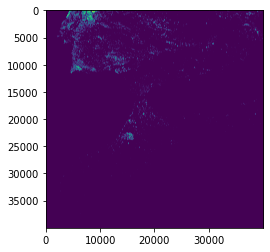

In [ ]:
#viewing raster data
plt.imshow(loss.read(1))
plt.show()

Creating a basemap through folium

In [ ]:
#chosen basemap and zoomed oppropriately... 
map1 = folium.Map(location=[39, 0], zoom_start=5)
map1

code cell below fails to work (based on lab 7 methods)



In [ ]:
#Overlay raster data on the basemap...

#Issue: raster data may not be a recognizable object that can be 'added' to the map

loss.add_to(map1)
map1

Trying to follow an online help article using folium image overlay
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/ImageOverlay.ipynb

In [ ]:
folium.raster_layers.ImageOverlay(
    image= loss,
    name="Attempt #1 (incorrect bounds)",
    bounds=[[0, 30], [10, 40]],
    opacity=1,
    interactive=False,
    cross_origin=False,
    #zindex=1,
    #alt="/Hansen_GFC_2020-v1.8_lossyear_40N_010W.tif",
).add_to(map1)

folium.LayerControl().add_to(map1)


map1

TypeError: ignored

trying to follow directions from another github article: https://github.com/GISerDaiShaoqing/My-Studies-of-Urban-GIS/blob/master/3.Spatial%20visualization%20demo%20in%20folium(for%20Python)/src/foliumrastervisdemo.py

In [ ]:
#Load library
import gdal
import folium
from folium import plugins

#Open raster file
#driver=gdal.GetDriverByName('/Hansen_GFC-2020-v1.8_lossyear_40N_010W.tif')
#driver.Register() 
ds = gdal.Open('/Hansen_GFC-2020-v1.8_lossyear_40N_010W.tif') 
if ds is None:
    print('Could not open')

#Get coordinates, cols and rows
geotransform = ds.GetGeoTransform()
cols = ds.RasterXSize 
rows = ds.RasterYSize 

#Get extent
xmin=geotransform[0]
ymax=geotransform[3]
xmax=xmin+cols*geotransform[1]
ymin=ymax+rows*geotransform[5]

#Get Central point
centerx=(xmin+xmax)/2
centery=(ymin+ymax)/2

#Raster convert to array in numpy
bands = ds.RasterCount
band=ds.GetRasterBand(1)
dataset= band.ReadAsArray(0,0,cols,rows)
dataimage=dataset
dataimage[dataimage[:,:]==-340282346638528859811704183484516925440.000]=0


#Visualization in folium
map= folium.Map(location=[centery, centerx], zoom_start=7,tiles='Stamen Terrain')
plugins.ImageOverlay(
    image=dataimage,
    bounds=[[ymin, xmin], [ymax, xmax]],
    colormap=lambda x: (1, 0, x, x),#R,G,B,alpha
).add_to(map)

#Save html
#map.save('wd.html')

ImportError: ignored

Trying to replicate the methods shared in 'importData.ipnyb'
FAILING to replicate because I cannoy properly import geemap


In [ ]:
# display data try 2
Map = geemap.Map(center=[40,-100], zoom=4)

#Map.centerObject(testImg,9)
#vizParams = {'bands':['B4','B3','B2'],'min':0,'max':10000,'gamma':[1.4, 1.4, 1.1]}
#Map.addLayer(testImg,vizParams,'Test')

Map

NameError: ignored